In [6]:
import matplotlib.pyplot as plt
import spacy

import pandas as pd
data = pd.read_csv('../../data/data.csv', sep=';')
from datasets import Dataset
dataset = Dataset.from_pandas(data)

dataset = dataset.to_pandas()

nlp = spacy.load("fr_core_news_sm")

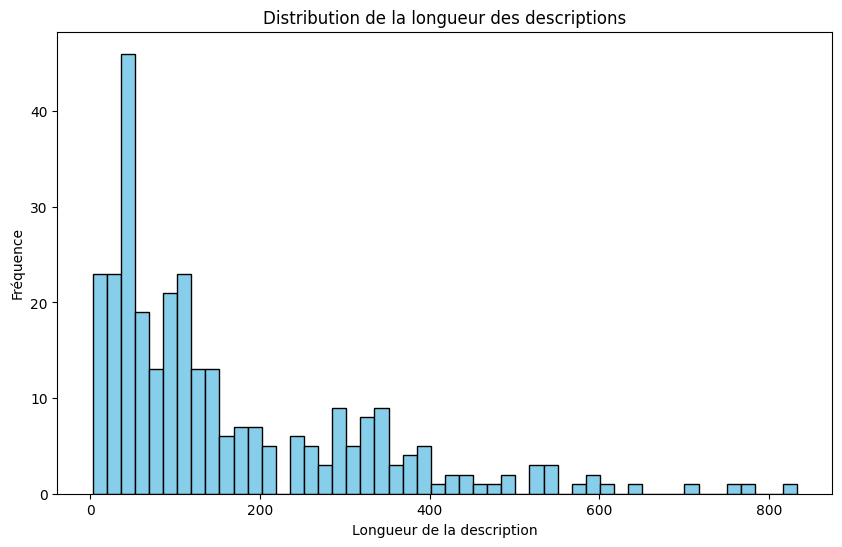

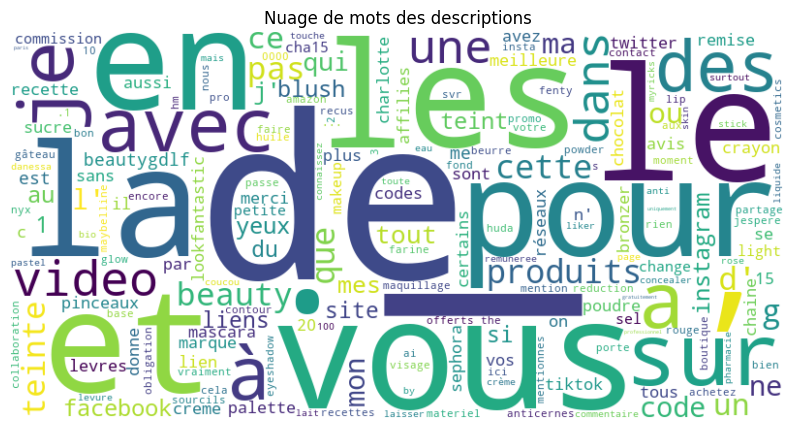

In [24]:
from wordcloud import WordCloud

def visualisation_texte(dataframe):
    """
    Cette fonction calcule la longueur de chaque description textuelle dans un DataFrame et la stocke dans une nouvelle colonne.
    Ensuite, elle affiche un histogramme de la longueur des descriptions textuelles et génère un nuage de mots basé sur la fréquence des mots dans les descriptions.

    Args:
        dataframe (pandas.DataFrame): Le DataFrame contenant les données.

    Returns:
        None
    """
    # Calculer la longueur de chaque description textuelle et la stocker dans une nouvelle colonne
    dataframe["longueur_description"] = dataframe["Description"].apply(lambda x: len(nlp(x)))

    # Afficher un histogramme de la longueur des descriptions textuelles
    plt.figure(figsize=(10, 6))
    plt.hist(dataframe["longueur_description"], bins=50, color='skyblue', edgecolor='black')
    plt.xlabel('Longueur de la description')
    plt.ylabel('Fréquence')
    plt.title('Distribution de la longueur des descriptions')
    plt.show()

    # Générer un nuage de mots basé sur la fréquence des mots dans les descriptions
    word_freq = {}
    for doc in nlp.pipe(dataframe['Description']):
        for word in doc:
            if word.text not in word_freq:
                word_freq[word.text] = 1
            else:
                word_freq[word.text] += 1

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nuage de mots des descriptions')
    plt.show()

visualisation_texte(dataset)



## Évaluation
En utilisant les modèle de sac de mots et TF-IDF pour évaluer la précision, le rappel et f-mesure de la text classification. Et on utilise le modèle de sklearn de python.

Précision: 0.9833333333333333


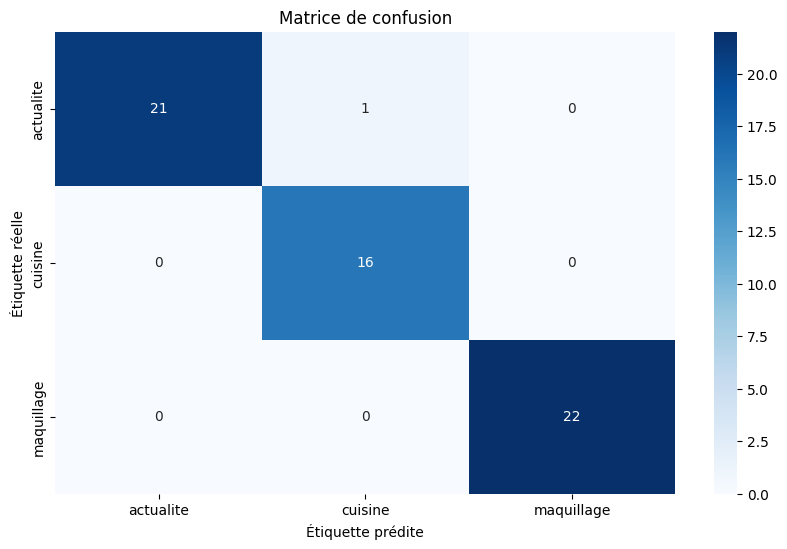

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

def classification_texte_avec_bayes(data_path):
    """
    Cette fonction charge les données à partir d'un fichier CSV, divise les données en ensembles
    de formation et de test, extrait les caractéristiques à l'aide du modèle de sac de mots (ou TF-IDF),
    entraîne un classificateur de Bayes multinomial et évalue sa performance en affichant la matrice de confusion.

    Args:
        data_path (str): Le chemin du fichier CSV contenant les données.

    Returns:
        None
    """
    # Charger les données
    data = pd.read_csv(data_path, sep=';')
    X = data['Description']
    y = data['Catégorie']

    # Diviser les données en ensembles de formation et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Extraire les caractéristiques en utilisant le modèle de sac de mots
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)

    # Entraîner le classificateur de Bayes multinomial
    clf = MultinomialNB()
    clf.fit(X_train_counts, y_train)

    # Faire des prédictions sur l'ensemble de test
    y_pred = clf.predict(X_test_counts)

    # Calculer l'exactitude du classificateur
    accuracy = accuracy_score(y_test, y_pred)
    print("Précision:", accuracy)

    # Afficher la matrice de confusion
    conf_mat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.xlabel('Étiquette prédite')
    plt.ylabel('Étiquette réelle')
    plt.title('Matrice de confusion')
    plt.show()

classification_texte_avec_bayes('../../data/data.csv')


## Loi de Zipf
   """
    
    Calcule et affiche la distribution Zipf des mots les plus fréquents dans les descriptions.

    Args:
        data_path (str): Le chemin du fichier CSV contenant les données.

    Returns:
        None
    """

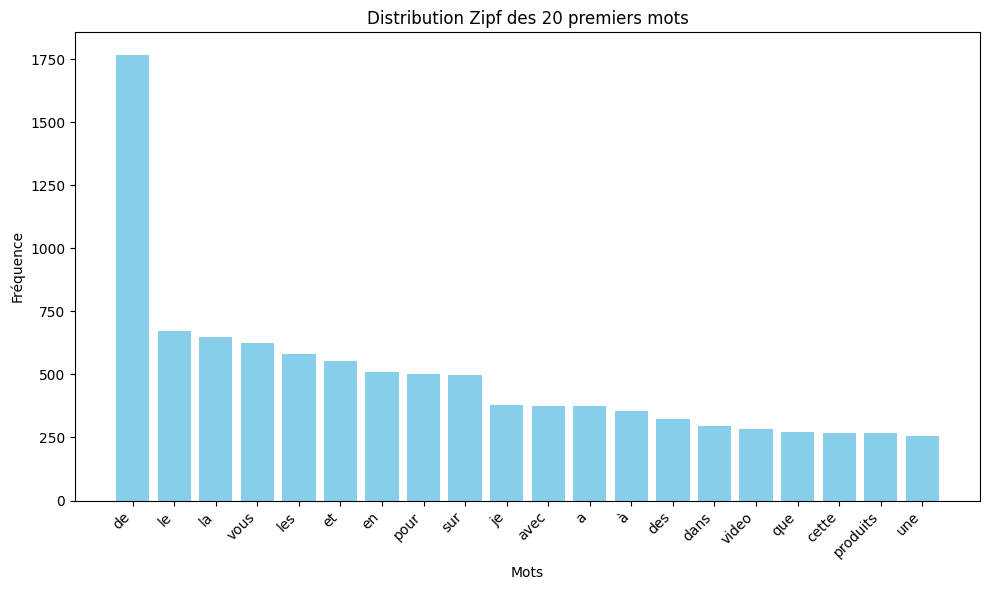

In [22]:
def calculate_zipf_distribution(data_path):
    """
    Calcule et affiche la distribution Zipf des mots les plus fréquents dans les descriptions.

    Args:
        data_path (str): Le chemin du fichier CSV contenant les données.

    Returns:
        None
    """
    # Charger les données
    data = pd.read_csv(data_path, sep=';')
    X_train = data['Description']

    # Calculer la fréquence des mots
    word_freq = {}
    for text in X_train:
        words = text.split()
        for word in words:
            if word in word_freq:
                word_freq[word] += 1
            else:
                word_freq[word] = 1

    # Trier les mots par fréquence
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

    # Extraire les 20 premiers mots et leur fréquence
    top_words = [item[0] for item in sorted_word_freq[:20]]
    word_counts = [item[1] for item in sorted_word_freq[:20]]

    # Afficher le graphique de la distribution Zipf
    plt.figure(figsize=(10, 6))
    plt.bar(top_words, word_counts, color='skyblue')
    plt.xlabel('Mots')
    plt.ylabel('Fréquence')
    plt.title('Distribution Zipf des 20 premiers mots')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

calculate_zipf_distribution('../../data/data.csv')
